In [2]:
%autosave 60
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

Autosaving every 60 seconds


### PRIMAIRES AMERICAINES DE 2016 ###

In [3]:
data = pd.read_csv("primary_results.csv",sep=",")

In [4]:
data.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078


In [5]:
data.columns

Index(['state', 'state_abbreviation', 'county', 'fips', 'party', 'candidate',
       'votes', 'fraction_votes'],
      dtype='object')

In [6]:
data[data.votes == max(data.votes)]

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
1386,California,CA,Los Angeles,6037.0,Democrat,Hillary Clinton,590502,0.57


In [8]:
data.candidate.unique()
data.party.unique()

array(['Democrat', 'Republican'], dtype=object)

In [13]:
data[data.county=='Autauga']

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
134,Alabama,AL,Autauga,1001.0,Republican,Ben Carson,1764,0.146
135,Alabama,AL,Autauga,1001.0,Republican,Donald Trump,5387,0.445
136,Alabama,AL,Autauga,1001.0,Republican,John Kasich,421,0.035
137,Alabama,AL,Autauga,1001.0,Republican,Marco Rubio,1785,0.148
138,Alabama,AL,Autauga,1001.0,Republican,Ted Cruz,2482,0.205


In [34]:
data[(data.fraction_votes == 1) & (data.votes > 10)]
##Ville où le résultat était un seul candidat de plus de 10 habitants

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
499,Alaska,AK,State House District 23,90200123.0,Democrat,Bernie Sanders,13,1.0
517,Alaska,AK,State House District 31,90200131.0,Democrat,Bernie Sanders,16,1.0
519,Alaska,AK,State House District 32,90200132.0,Democrat,Bernie Sanders,13,1.0
531,Alaska,AK,State House District 38,90200138.0,Democrat,Bernie Sanders,17,1.0
537,Alaska,AK,State House District 40,90200140.0,Democrat,Bernie Sanders,12,1.0
539,Alaska,AK,State House District 5,90200105.0,Democrat,Bernie Sanders,15,1.0
541,Alaska,AK,State House District 6,90200106.0,Democrat,Bernie Sanders,12,1.0
24570,Wyoming,WY,Campbell-Johnson,95600032.0,Republican,Ted Cruz,68,1.0
24586,Wyoming,WY,Goshen-Platte,95600035.0,Republican,Ted Cruz,83,1.0
24590,Wyoming,WY,Hot Springs-Washakie,95600030.0,Republican,Ted Cruz,43,1.0


In [35]:
data.groupby("state").votes.sum().sort_values()

state
North Dakota          354
Wyoming              1183
Maine                3415
Alaska              22469
Hawaii              46886
Nevada              86815
Kansas             111296
South Dakota       119881
Colorado           121184
Delaware           160416
Rhode Island       179594
Vermont            192960
Nebraska           213691
Idaho              238989
Utah               254203
Montana            257516
New Mexico         309532
Iowa               326704
West Virginia      398352
New Hampshire      525966
Connecticut        531302
Washington         537150
Louisiana          585781
Arkansas           605971
Mississippi        614200
Kentucky           648885
Oklahoma           766123
Arizona            834200
Oregon             933975
South Carolina    1105408
Tennessee         1200576
Alabama           1223959
Maryland          1233272
New Jersey        1321220
Missouri          1531672
Indiana           1719291
Virginia          1791672
Massachusetts     1813320
Georgi

In [37]:
total_votes = data.pivot_table('votes',index='state',columns='party',aggfunc=sum)
total_votes
#Pivot Table agregate somme des votes par candidats ou par Parti
#Agregate nb votants par State

party,Democrat,Republican
state,,
Alabama,386327.0,837632.0
Alaska,539.0,21930.0
Arizona,399097.0,435103.0
Arkansas,209448.0,396523.0
California,3442623.0,1495574.0
Colorado,121184.0,NaN
Connecticut,322485.0,208817.0
Delaware,92609.0,67807.0
Florida,1664003.0,2276926.0


<BarContainer object of 49 artists>

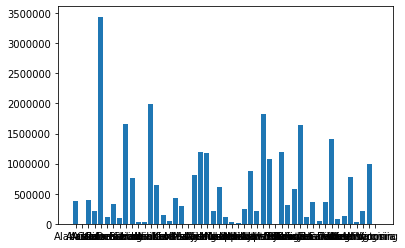

In [59]:
##total_votes.index
##total_votes[['Democrat']]
total_votes["Democrat"].tolist()
plt.bar(total_votes.index,total_votes['Democrat'].tolist())

<BarContainer object of 7 artists>

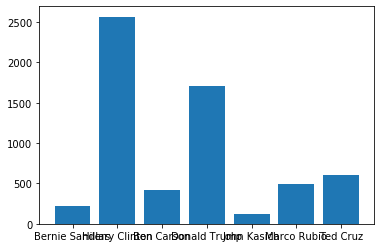

In [70]:
alabama = data[(data.county == "Barbour") & (data.state=="Alabama")]
plt.bar(alabama.candidate,alabama.votes)